In [1]:
import pandas as pd
df = pd.read_csv('vHoneyNeonic_v03.csv')

In [2]:
df.isna()
nudf = df.dropna()

In [3]:
nudf

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,WY,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016,Wyoming,West,56,0.0,27.5,9.4,0.0,0.0,36.9
1128,WY,43000.0,80,3440000.0,894000.0,1.00,3440000.0,2007,Wyoming,West,56,122.2,198.3,76.3,0.0,0.0,396.8
1129,WY,46000.0,60,2760000.0,524000.0,0.68,1877000.0,1998,Wyoming,West,56,0.0,91.2,0.0,0.0,0.0,91.2
1130,WY,47000.0,66,3102000.0,558000.0,2.11,6545000.0,2013,Wyoming,West,56,840.9,155.9,526.2,0.0,0.0,1523.0


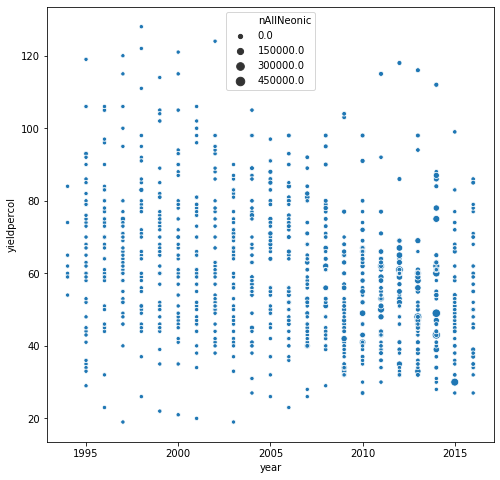

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="year", y="yieldpercol", size = 'nAllNeonic', data=nudf)

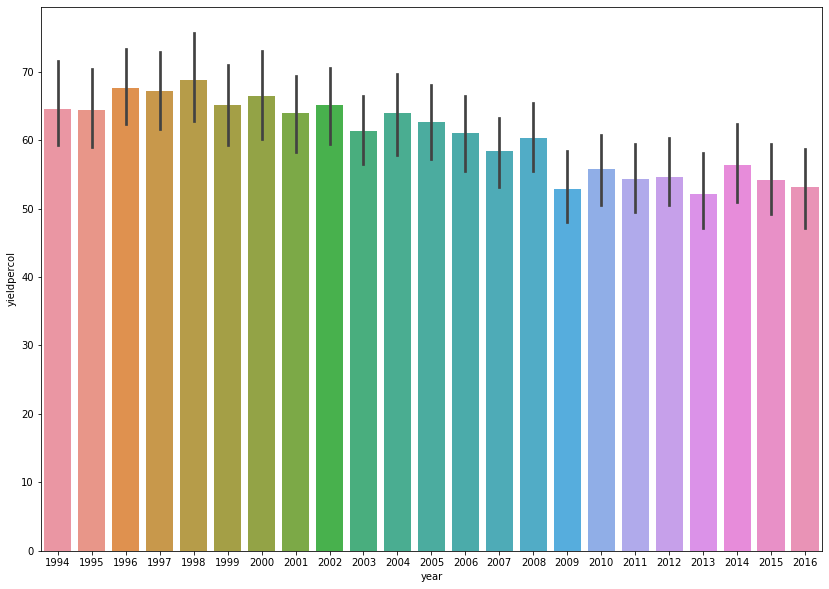

In [7]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="yieldpercol" , data=nudf)

In [8]:
outlierdf = nudf[['year' , 'yieldpercol']]

In [9]:
df3 = outlierdf

In [10]:
year = nudf['year']

In [11]:
q1 = df3['yieldpercol'].quantile(.25)
q3 = df3['yieldpercol'].quantile(.75)
mask = df3['yieldpercol'].between(q1, q3, inclusive=True)
iqr = df3.loc[mask, 'yieldpercol']

In [12]:
iqr

0       66
1       64
2       58
7       56
8       72
        ..
1126    56
1127    68
1129    60
1130    66
1131    51
Name: yieldpercol, Length: 457, dtype: int64

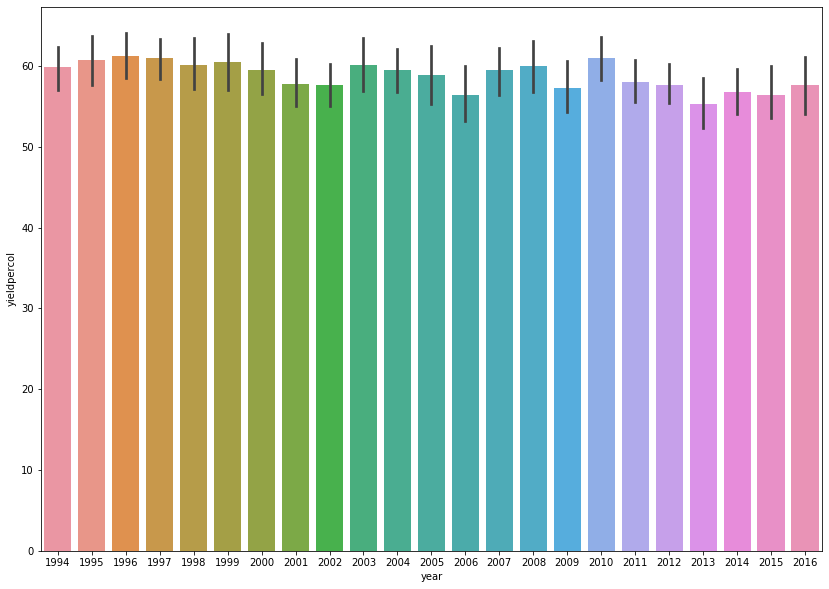

In [13]:
plt.figure(figsize=(14,10))
ax4 = sns.barplot(x=year, y=iqr)

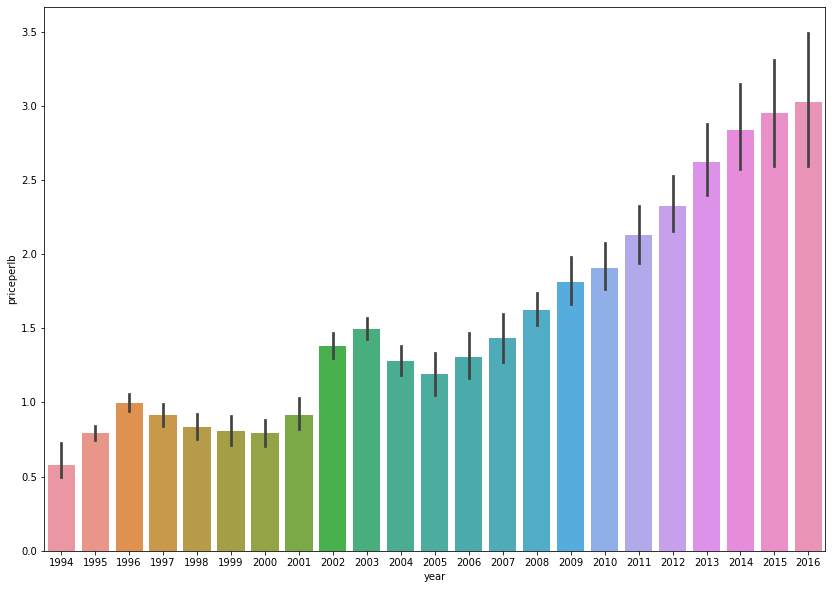

In [14]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="priceperlb" , data=nudf)

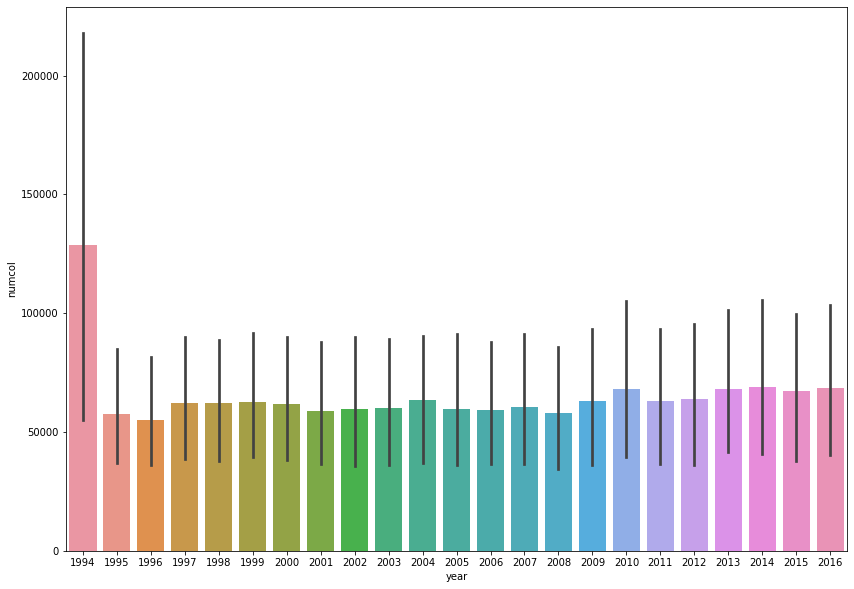

In [15]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="numcol", data=nudf )

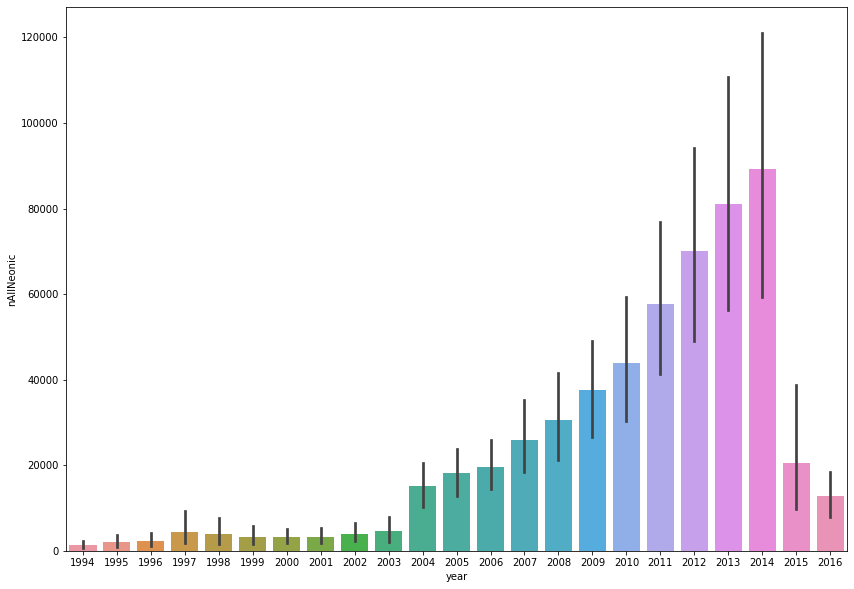

In [16]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="nAllNeonic" , data=nudf)

In [17]:
years_pest = nudf.groupby('year')['nAllNeonic'].sum().reset_index()
years_pest

,year,nAllNeonic
0,1994,11207.2
1,1995,82134.0
2,1996,101002.5
3,1997,185898.7
4,1998,166324.4
5,1999,140227.8
6,2000,133949.2
7,2001,143690.4
8,2002,168746.2
9,2003,203264.0


In [18]:
for i, row in years_pest.iterrows():
#     print(i)
#     print(row)
    try:
        years_pest.loc[i,'% Change'] = round(((years_pest.loc[i,'nAllNeonic'] - years_pest.loc[i-1,'nAllNeonic']) 
                                    / years_pest.loc[i,'nAllNeonic'] ) * 100, 2)
        years_pest.loc[i,'Raw Change'] = round(years_pest.loc[i,'nAllNeonic'] - years_pest.loc[i-1,'nAllNeonic']
                                                , 2)
    except:
        pass

years_pest

,year,nAllNeonic,% Change,Raw Change
0,1994,11207.2,NaN,NaN
1,1995,82134.0,86.35,70926.8
2,1996,101002.5,18.68,18868.5
3,1997,185898.7,45.67,84896.2
4,1998,166324.4,-11.77,-19574.3
5,1999,140227.8,-18.61,-26096.6
6,2000,133949.2,-4.69,-6278.6
7,2001,143690.4,6.78,9741.2
8,2002,168746.2,14.85,25055.8
9,2003,203264.0,16.98,34517.8


In [19]:
years_pest['Abs % Change'] = abs(years_pest['% Change'])
years_pest['Abs Raw Change'] = abs(years_pest['Raw Change'])
years_pest

,year,nAllNeonic,% Change,Raw Change,Abs % Change,Abs Raw Change
0,1994,11207.2,NaN,NaN,NaN,NaN
1,1995,82134.0,86.35,70926.8,86.35,70926.8
2,1996,101002.5,18.68,18868.5,18.68,18868.5
3,1997,185898.7,45.67,84896.2,45.67,84896.2
4,1998,166324.4,-11.77,-19574.3,11.77,19574.3
5,1999,140227.8,-18.61,-26096.6,18.61,26096.6
6,2000,133949.2,-4.69,-6278.6,4.69,6278.6
7,2001,143690.4,6.78,9741.2,6.78,9741.2
8,2002,168746.2,14.85,25055.8,14.85,25055.8
9,2003,203264.0,16.98,34517.8,16.98,34517.8


In [20]:
years_pest.nlargest( 5,'Abs % Change')

,year,nAllNeonic,% Change,Raw Change,Abs % Change,Abs Raw Change
21,2015,801069.0,-334.23,-2677409.9,334.23,2677409.9
1,1995,82134.0,86.35,70926.8,86.35,70926.8
22,2016,438780.4,-82.57,-362288.6,82.57,362288.6
10,2004,604129.3,66.35,400865.3,66.35,400865.3
3,1997,185898.7,45.67,84896.2,45.67,84896.2


In [21]:
years_pest.nlargest( 5,'Abs Raw Change')

,year,nAllNeonic,% Change,Raw Change,Abs % Change,Abs Raw Change
21,2015,801069.0,-334.23,-2677409.9,334.23,2677409.9
17,2011,2247466.3,23.97,538606.5,23.97,538606.5
18,2012,2732574.3,17.75,485108.0,17.75,485108.0
10,2004,604129.3,66.35,400865.3,66.35,400865.3
20,2014,3478478.9,11.33,393939.3,11.33,393939.3


In [22]:
sumyears = nudf.groupby('year').sum().reset_index()
sumyears

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,1994,1031000.0,517,68934000.0,15323000.0,4.65,34956000.0,212,0.0,11207.2,0.0,0.0,0.0,11207.2
1,1995,2412000.0,2707,185486000.0,38217000.0,33.35,128738000.0,1290,0.0,82134.0,0.0,0.0,0.0,82134.0
2,1996,2320000.0,2842,176888000.0,41909000.0,41.82,158579000.0,1290,0.0,101002.5,0.0,0.0,0.0,101002.5
3,1997,2608000.0,2819,193989000.0,70332000.0,38.41,147416000.0,1283,0.0,185898.7,0.0,0.0,0.0,185898.7
4,1998,2613000.0,2890,218575000.0,80499000.0,35.03,145364000.0,1283,0.0,166324.4,0.0,0.0,0.0,166324.4
5,1999,2629000.0,2735,201747000.0,78358000.0,33.78,123145000.0,1283,0.0,140227.8,0.0,0.0,0.0,140227.8
6,2000,2597000.0,2794,218774000.0,84831000.0,33.21,130925000.0,1283,0.0,133698.6,250.6,0.0,0.0,133949.2
7,2001,2534000.0,2753,185052000.0,64680000.0,39.25,131676000.0,1328,0.0,139194.3,4496.1,0.0,0.0,143690.4
8,2002,2558000.0,2803,170313000.0,39148000.0,59.23,226245000.0,1328,0.0,132215.0,27513.6,9017.6,0.0,168746.2
9,2003,2584000.0,2638,180574000.0,40576000.0,64.32,250922000.0,1328,0.0,150286.6,27857.3,25120.1,0.0,203264.0


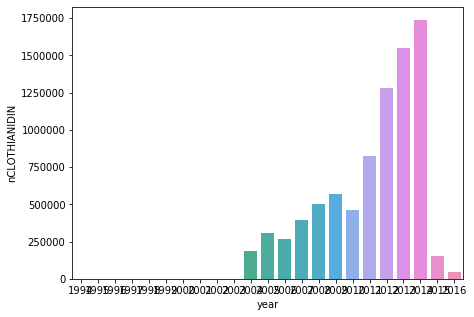

In [24]:
plt.figure(figsize=(7,5))
ax1 = sns.barplot(x="year", y="nCLOTHIANIDIN" , data=sumyears)

In [25]:
df['year'].value_counts()

1991    44
2003    44
1992    44
1993    44
1994    44
1995    44
1996    44
2001    44
2002    44
1997    43
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2016    40
2009    40
2010    40
2011    40
2012    40
2014    40
2015    40
2017    40
2013    39
Name: year, dtype: int64

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
formula = 'yieldpercol ~ nCLOTHIANIDIN + nIMIDACLOPRID + nTHIAMETHOXAM + nACETAMIPRID + nTHIACLOPRID'
lm = ols(formula, nudf).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                      sum_sq     df         F    PR(>F)
nCLOTHIANIDIN    2477.768761    1.0  7.284736  0.007086
nIMIDACLOPRID     422.136419    1.0  1.241097  0.265561
nTHIAMETHOXAM    3352.764196    1.0  9.857256  0.001747
nACETAMIPRID      975.821318    1.0  2.868952  0.090654
nTHIACLOPRID     2436.754233    1.0  7.164151  0.007574
Residual       302376.988404  889.0       NaN       NaN


In [35]:
nudf['nTHIAMETHOXAM'].quantile(1)

64834.6

In [36]:
nudf['nTHIAMETHOXAM_category'] = pd.cut(nudf['nTHIAMETHOXAM'], [0, 1192.1120000000058, 278498.8], labels=['low','high'])

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
nudf.shape

(895, 18)

In [37]:
nudf['nTHIAMETHOXAM'].quantile(0.50)

463.2

In [38]:
 median = nudf['nTHIAMETHOXAM'].quantile(0.50)
for i, row in nudf.iterrows():
    if row['nTHIAMETHOXAM'] <= median:
        nudf.loc[i,'nTHIAMETHOXAM_category'] = 'low'
    else:
        nudf.loc[i,'nTHIAMETHOXAM_category'] = 'high'

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
nudf['nTHIAMETHOXAM_category'].value_counts()

low     448
high    447
Name: nTHIAMETHOXAM_category, dtype: int64

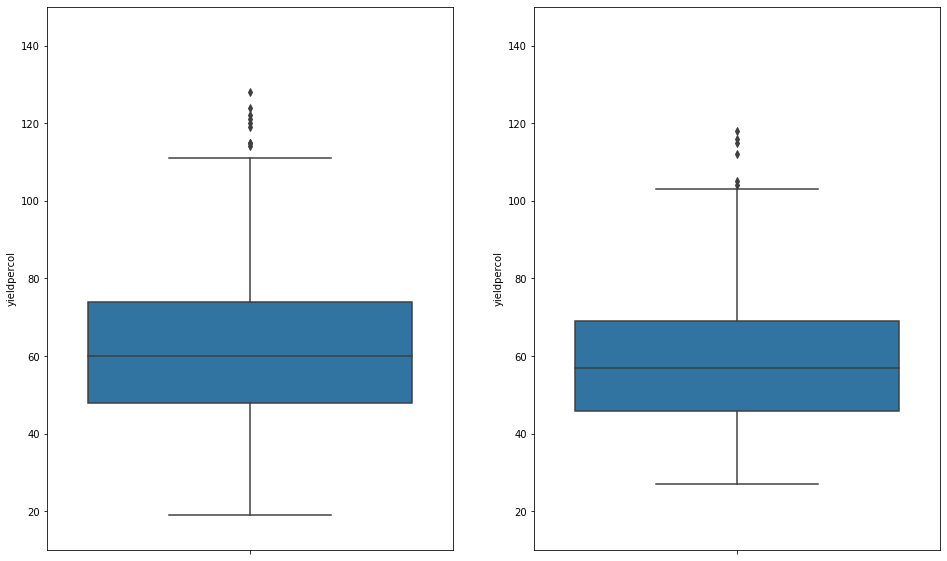

In [40]:
low = nudf[nudf['nTHIAMETHOXAM_category'] == 'low']
high = nudf[nudf['nTHIAMETHOXAM_category'] == 'high']

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=low, y='yieldpercol')
plt.ylim([10, 150])

plt.subplot(1, 2, 2)
sns.boxplot(data=high, y='yieldpercol')
plt.ylim([10, 150])
plt.show()